# Transfer Learning of VGG16

## Imports

In [1]:
#import sys
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import PIL
import PIL.Image
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from keras import regularizers

# from sklearn.datasets import load_files
# from keras.preprocessing import image
# from tqdm import tqdm # progress bar

np.random.seed(42) # note that you must use the same seed to ensure consistentcy in your training/validation/testing
tf.random.set_seed(42)

2025-03-24 18:26:27.518041: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 18:26:27.957137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-24 18:26:28.096965: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-24 18:26:28.131713: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-24 18:26:28.417019: I tensorflow/core/platform/cpu_feature_guar

## Load Data

In [2]:
train_data_dir = "Data/train/"
#Arbitrarily chosen we can adjust these
batch_size = 32                   
img_height = 224 #150
img_width = 224 #150

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels= "inferred",
    #label_mode="int",
    label_mode = "categorical",
    #color_mode = One of "grayscale", "rgb", "rgba". Defaults to "rgb". Whether the images will be converted to have 1, 3, or 4 channels.
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 32942 files belonging to 4 classes.


2025-03-24 18:26:33.057561: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1307 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:e3:00.0, compute capability: 8.6
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized fe

In [3]:
val_data_dir = "Data/val/"

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_data_dir,
    labels= "inferred",
    #label_mode="int",
    label_mode = "categorical",
    #color_mode = One of "grayscale", "rgb", "rgba". Defaults to "rgb". Whether the images will be converted to have 1, 3, or 4 channels.,
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 8538 files belonging to 4 classes.


In [4]:
test_data_dir = "Data/test/"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    labels= "inferred",
    #label_mode="int",
    label_mode = "categorical",
    #color_mode = One of "grayscale", "rgb", "rgba". Defaults to "rgb". Whether the images will be converted to have 1, 3, or 4 channels., 
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 5265 files belonging to 4 classes.


In [5]:
# Combine Test and Validation to make more cohesive validation set 

# combined_ds = val_ds.concatenate(test_ds)
# combined_ds = combined_ds.shuffle(buffer_size=1000, seed=42)

## Model 1 - VGG16 no additional learning

Requires the datasets to have

label_mode="int"

and model to have

loss=tf.keras.losses.SparseCategoricalCrossentropy()

### Build Model 

In [6]:
model = keras.Sequential() 
VGG16 = keras.applications.VGG16(
        include_top=False,
        weights="imagenet",
        input_tensor=None, 
        input_shape=(img_height, img_width, 3), 
        pooling="max",
        classes=4, 
        classifier_activation="softmax",
)
# Don't change what VGG16 has already learned
for layer in VGG16.layers: 
    layer.trainable = False

model.add(VGG16)
#model.add(keras.layers.Flatten()) 
#model.add(keras.layers.Dense(128, activation='relu'))
#model.add(keras.layers.Dense(4, activation='softmax'))

### Compile and Train the Model

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']#, 'AUC']
             )
epochs = 15
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs
)

Epoch 1/15


2025-03-17 13:46:31.847626: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90501
W0000 00:00:1742233592.068650  781970 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742233592.094299  781970 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742233592.095334  781970 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742233592.096391  781970 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742233592.100336  781970 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742233592.115852  781970 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742233592.117414  781970 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742233592.119030  781970 gpu_

InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/__main__.py", line 5, in <module>

  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 739, in start

  File "/usr/local/lib/python3.12/dist-packages/tornado/platform/asyncio.py", line 215, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_781493/4142059017.py", line 6, in <module>

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1804, in fit

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1398, in train_function

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1381, in step_function

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1370, in run_step

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1148, in train_step

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1206, in compute_loss

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/backend.py", line 5777, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,512] and labels shape [128]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1332]

### Visualize Training Results

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the Model

In [ ]:
loss, acc, AUC = model.evaluate(val_ds)
print(f"Validation accuracy: {acc:.2f}")
print(f"Validation loss: {loss:.2f}")
print(f"Validation AUC: {AUC:.2f}")

### Predict on New Data

## Model 2

### Build Model

In [5]:
model = keras.Sequential() 
VGG16 = keras.applications.VGG16(
        include_top=False,
        weights="imagenet",
        input_tensor=None, 
        input_shape=(img_height, img_width, 3), 
        pooling="max"#,
        #classes=4, 
        #classifier_activation="softmax",
)
# Don't change what VGG16 has already learned
for layer in VGG16.layers: 
    layer.trainable = False

model.add(VGG16)
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))

### Compile and Train the Model

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', 'AUC', keras.metrics.F1Score(), keras.metrics.Recall(), keras.metrics.Precision()])
epochs = 15
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs
)

Epoch 1/15


W0000 00:00:1742855376.545431  423124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742855376.546448  423124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742855376.547410  423124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742855376.548455  423124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742855376.549779  423124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742855376.551162  423124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742855376.552655  423124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742855376.554258  423124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1742855376.555740  423124 gp

ResourceExhaustedError: Graph execution error:

Detected at node sequential/vgg16/block1_conv2/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/__main__.py", line 5, in <module>

  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 739, in start

  File "/usr/local/lib/python3.12/dist-packages/tornado/platform/asyncio.py", line 215, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_416589/1120996781.py", line 5, in <module>

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1804, in fit

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1398, in train_function

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1381, in step_function

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1370, in run_step

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1147, in train_step

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 588, in __call__

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/sequential.py", line 397, in call

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/functional.py", line 514, in call

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/functional.py", line 671, in _run_internal_graph

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 588, in __call__

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/functional.py", line 514, in call

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/functional.py", line 671, in _run_internal_graph

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/layers/convolutional/base_conv.py", line 320, in call

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/backend.py", line 5397, in relu

OOM when allocating tensor with shape[32,64,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/vgg16/block1_conv2/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_3856]

### Visualize Training Results

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the Model

In [9]:
loss, acc, AUC, f1_score, recall, precision = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.4f}")
print(f"Test loss: {loss:.4f}")
print(f"Test AUC: {AUC:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test precision: {precision:.4f}")
print("Test f1 score", f1_score)

165/165 [==============================] - 8s 45ms/step - loss: 0.2611 - accuracy: 0.9034 - auc: 0.9869 - f1_score: 0.9067 - recall: 0.8975 - precision: 0.9086
Test accuracy: 0.9034
Test loss: 0.2611
Test AUC: 0.9869
Test recall: 0.8975
Test precision: 0.9086
Test f1 score [0.94889003 0.83752495 0.89377093 0.946593  ]


### Predict on New Data 

In [10]:
# import PIL
# import PIL.Image
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#Load images
first_COVID_img = tf.keras.utils.load_img("Data/test/COVID19/covid_10.png", target_size=(224, 224))
first_normal_img = tf.keras.utils.load_img("Data/test/NORMAL/IM-0009-0001.jpeg", target_size=(224, 224))
first_pneumonia_img = tf.keras.utils.load_img("Data/test/PNEUMONIA/non_COVID (10).png", target_size=(224, 224))
first_tuberculosis_img = tf.keras.utils.load_img("Data/test/TUBERCULOSIS/TB.1013.jpg", target_size=(224, 224))

#Image to vector
first_COVID_img_array =tf.keras.utils.img_to_array(first_COVID_img)
first_normal_img_array =tf.keras.utils.img_to_array(first_normal_img)
first_pneumonia_img_array =tf.keras.utils.img_to_array(first_pneumonia_img)
first_tuberculosis_img_array =tf.keras.utils.img_to_array(first_tuberculosis_img)

#Dimension expansion
first_COVID_img_array = tf.expand_dims(first_COVID_img_array, 0)
first_normal_img_array = tf.expand_dims(first_normal_img_array, 0)
first_pneumonia_img_array = tf.expand_dims(first_pneumonia_img_array, 0)
first_tuberculosis_img_array = tf.expand_dims(first_tuberculosis_img_array, 0)

#Predictions
first_COVID_prediction = model.predict(first_COVID_img_array)
first_normal_prediction = model.predict(first_normal_img_array)
first_pneumonia_prediction = model.predict(first_pneumonia_img_array)
first_tuberculosis_prediction = model.predict(first_tuberculosis_img_array)

#Obtain probability of class
first_COVID_score = tf.nn.softmax(first_COVID_prediction[0])
first_normal_score = tf.nn.softmax(first_normal_prediction[0])
first_pneumonia_score = tf.nn.softmax(first_pneumonia_prediction[0])
first_tuberculosis_score = tf.nn.softmax(first_tuberculosis_prediction[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_COVID_score)], 100 * np.max(first_COVID_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_normal_score)], 100 * np.max(first_normal_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_pneumonia_score)], 100 * np.max(first_pneumonia_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_tuberculosis_score)], 100 * np.max(first_tuberculosis_score)))

1/1 [==============================] - 0s 16ms/step
This image most likely belongs to COVID19 with a 46.40 percent confidence.
This image most likely belongs to PNEUMONIA with a 45.26 percent confidence.
This image most likely belongs to PNEUMONIA with a 40.54 percent confidence.
This image most likely belongs to TURBERCULOSIS with a 47.54 percent confidence.


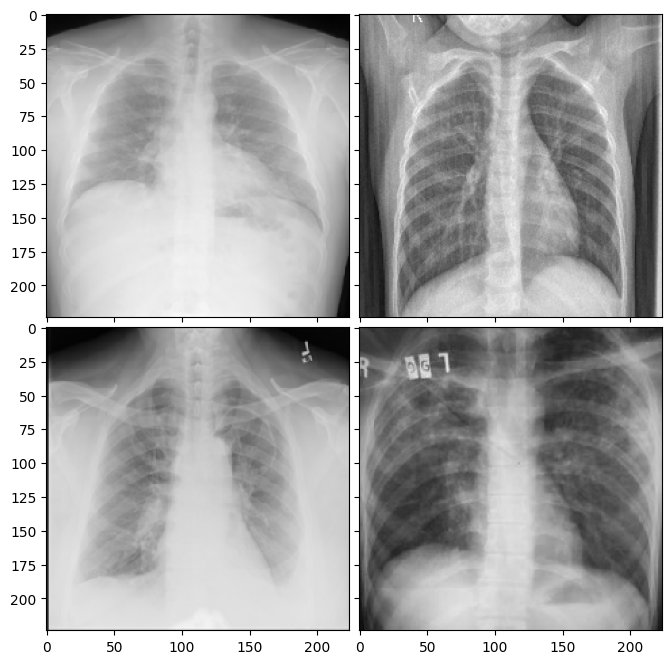

In [11]:
# Need to add labels as title for each image
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import ImageGrid
image_list = [first_COVID_img, first_normal_img, first_pneumonia_img, first_tuberculosis_img]

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2),  
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, image_list):
    ax.imshow(im)

plt.show()

In [12]:
#from sklearn.metrics import confusion_matrix
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_true = np.argmax(y_true, axis=1)
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

2025-03-21 11:16:54.642952: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


165/165 [==============================] - 7s 40ms/step
Confusion Matrix:
 [[723 483 627  98]
 [471 299 397  49]
 [656 433 642  95]
 [ 93  74 104  15]]


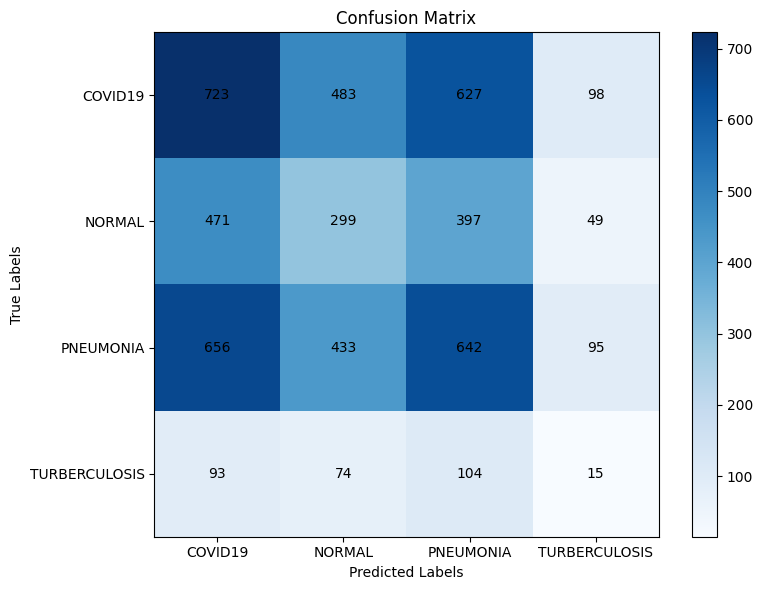

In [13]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Set axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set class labels on axes
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)

# Annotate each cell with the corresponding value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

## Trying Keras Tuning

In [27]:
import keras
import keras_tuner as kt

#Build function to test different hyperparameters
#Trying just relu, because tanh has never been top performing
def build_model(hp):
    tuned_model = keras.Sequential() 
    VGG16_model1 = keras.applications.VGG16(
                    include_top=False,
                    weights="imagenet",
                    input_tensor=None, 
                    input_shape=(img_height, img_width, 3), 
                    pooling="max")#,
                    #classes=num_classes, 
                    #classifier_activation="softmax"

    # Don't change what VGG16 has already learned
    for layer in VGG16_model1.layers: 
        layer.trainable = False
    tuned_model.add(VGG16_model1) 
    tuned_model.add(keras.layers.Flatten())
        
    #hp_activation = hp.Choice('activation', values =['relu','tanh'])
    hp_layer_1 = hp.Int('layer_1',min_value = 32, max_value = 512, step = 32) 
    hp_layer_2 = hp.Int('layer_2',min_value = 32, max_value = 512, step = 32) 
    hp_learning_rate = hp.Choice('learning_rate', values = [0.0001, 0.001, 0.01])

    tuned_model.add(keras.layers.Dense(units = hp_layer_1, activation = 'relu'))#hp_activation)) 
    tuned_model.add(keras.layers.Dense(units = hp_layer_2, activation = 'relu'))#hp_activation)) 
    tuned_model.add(keras.layers.Dense(4, activation='softmax'))
    tuned_model.compile(optimizer=keras.optimizers.Adam(learning_rate = hp_learning_rate),
                        #loss='sparse_categorical_crossentropy',
                        loss='categorical_crossentropy',
                        metrics=['accuracy', 'AUC', keras.metrics.F1Score(), keras.metrics.Recall(), keras.metrics.Precision()]) 
    return tuned_model
build_model(kt.HyperParameters())

<Sequential name=sequential_2, built=True>

In [28]:
#Define type of search and designate location for files to save
tuner = kt.RandomSearch(hypermodel=build_model,
                        objective="val_accuracy",
                        max_trials=10,
                        executions_per_trial=2,
                        overwrite=True,
                        directory="VGG16 Hyperparameter Tuning",
                        project_name="Tuning Results")                        

In [29]:
#Displays the hyperparameters we are exploring
tuner.search_space_summary()

Search space summary
Default search space size: 3
layer_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
layer_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.001, 0.01], 'ordered': True}


In [30]:
#Utilizing stop early to save computation time
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3) 
# Execute the search
tuner.search(train_ds,validation_data= val_ds, epochs = 15, callbacks = [stop_early])

Trial 10 Complete [00h 19m 20s]
val_accuracy: 0.9357577860355377

Best val_accuracy So Far: 0.9357577860355377
Total elapsed time: 02h 39m 48s


In [31]:
#View best model result
models = tuner.get_best_models(num_models=2) 
best_model = models[0]
best_model.summary()

/home/uwa6xv/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 192)            │        98,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           772 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,076,612 (57.51 MB)

 Trainable params: 361,924 (1.38 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [32]:
# Displays results of all trials in order of best to worst performance
tuner.results_summary()

Results summary
Results in VGG16 Hyperparameter Tuning/Tuning Results
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
layer_1: 512
layer_2: 192
learning_rate: 0.0001
Score: 0.9357577860355377

Trial 07 summary
Hyperparameters:
layer_1: 160
layer_2: 224
learning_rate: 0.0001
Score: 0.9276762902736664

Trial 02 summary
Hyperparameters:
layer_1: 352
layer_2: 96
learning_rate: 0.001
Score: 0.9170766174793243

Trial 00 summary
Hyperparameters:
layer_1: 128
layer_2: 128
learning_rate: 0.001
Score: 0.9081166684627533

Trial 01 summary
Hyperparameters:
layer_1: 480
layer_2: 256
learning_rate: 0.001
Score: 0.9069454073905945

Trial 04 summary
Hyperparameters:
layer_1: 96
layer_2: 288
learning_rate: 0.001
Score: 0.8819981217384338

Trial 05 summary
Hyperparameters:
layer_1: 32
layer_2: 64
learning_rate: 0.0001
Score: 0.8575778901576996

Trial 03 summary
Hyperparameters:
layer_1: 192
layer_2: 128
learning_rate: 0.01
Score: 0.84955492615699

## Model 3 - Good Hyperparameter Result

### Build Model

In [14]:
model = keras.Sequential() 
VGG16 = keras.applications.VGG16(
        include_top=False,
        weights="imagenet",
        input_tensor=None, 
        input_shape=(img_height, img_width, 3), 
        pooling="max",
        #classes=4, 
        #classifier_activation="softmax",
)
# Don't change what VGG16 has already learned
for layer in VGG16.layers: 
    layer.trainable = False

model.add(VGG16)
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(224, activation='relu'))
model.add(keras.layers.Dense(320, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))

### Compile and Train the Model

In [15]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', 'AUC', keras.metrics.F1Score(), keras.metrics.Recall(), keras.metrics.Precision()])
epochs = 15
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs
)

Epoch 1/15
1030/1030 [==============================] - 59s 55ms/step - loss: 0.9789 - accuracy: 0.7688 - auc: 0.9278 - f1_score: 0.7469 - recall_1: 0.7532 - precision_1: 0.7832 - val_loss: 0.4624 - val_accuracy: 0.8223 - val_auc: 0.9620 - val_f1_score: 0.8117 - val_recall_1: 0.8000 - val_precision_1: 0.8436
Epoch 2/15
1030/1030 [==============================] - 57s 55ms/step - loss: 0.4220 - accuracy: 0.8422 - auc: 0.9687 - f1_score: 0.8397 - recall_1: 0.8282 - precision_1: 0.8552 - val_loss: 0.4015 - val_accuracy: 0.8559 - val_auc: 0.9722 - val_f1_score: 0.8668 - val_recall_1: 0.8477 - val_precision_1: 0.8640
Epoch 3/15
1030/1030 [==============================] - 58s 56ms/step - loss: 0.3558 - accuracy: 0.8663 - auc: 0.9769 - f1_score: 0.8689 - recall_1: 0.8551 - precision_1: 0.8764 - val_loss: 0.3964 - val_accuracy: 0.8548 - val_auc: 0.9724 - val_f1_score: 0.8592 - val_recall_1: 0.8433 - val_precision_1: 0.8636
Epoch 4/15
1030/1030 [==============================] - 58s 56ms/step 

### Visualize Training Results

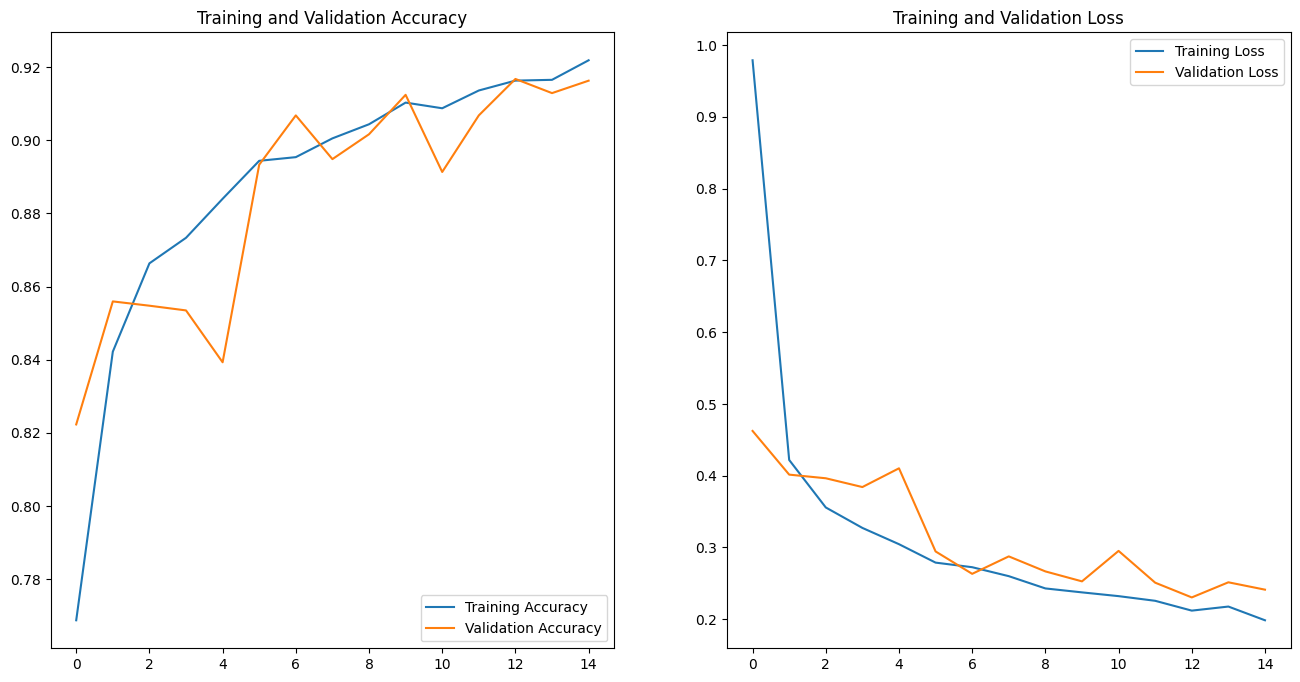

In [16]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the Model

In [17]:
loss, acc, AUC, f1_score, recall, precision = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.4f}")
print(f"Test loss: {loss:.4f}")
print(f"Test AUC: {AUC:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test precision: {precision:.4f}")
print("Test f1 score", f1_score)

165/165 [==============================] - 30s 174ms/step - loss: 0.2238 - accuracy: 0.9184 - auc: 0.9895 - f1_score: 0.9251 - recall_1: 0.9160 - precision_1: 0.9203
Test accuracy: 0.9184
Test loss: 0.2238
Test AUC: 0.9895
Test recall: 0.9160
Test precision: 0.9203
Test f1 score [0.9682292  0.85748124 0.8989079  0.9756097 ]


### Predict on New Data

In [18]:
# import PIL
# import PIL.Image
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#Load images
first_COVID_img = tf.keras.utils.load_img("Data/test/COVID19/covid_10.png", target_size=(224, 224))
first_normal_img = tf.keras.utils.load_img("Data/test/NORMAL/IM-0009-0001.jpeg", target_size=(224, 224))
first_pneumonia_img = tf.keras.utils.load_img("Data/test/PNEUMONIA/non_COVID (10).png", target_size=(224, 224))
first_tuberculosis_img = tf.keras.utils.load_img("Data/test/TUBERCULOSIS/TB.1013.jpg", target_size=(224, 224))

#Image to vector
first_COVID_img_array =tf.keras.utils.img_to_array(first_COVID_img)
first_normal_img_array =tf.keras.utils.img_to_array(first_normal_img)
first_pneumonia_img_array =tf.keras.utils.img_to_array(first_pneumonia_img)
first_tuberculosis_img_array =tf.keras.utils.img_to_array(first_tuberculosis_img)

#Dimension expansion
first_COVID_img_array = tf.expand_dims(first_COVID_img_array, 0)
first_normal_img_array = tf.expand_dims(first_normal_img_array, 0)
first_pneumonia_img_array = tf.expand_dims(first_pneumonia_img_array, 0)
first_tuberculosis_img_array = tf.expand_dims(first_tuberculosis_img_array, 0)

#Predictions
first_COVID_prediction = model.predict(first_COVID_img_array)
first_normal_prediction = model.predict(first_normal_img_array)
first_pneumonia_prediction = model.predict(first_pneumonia_img_array)
first_tuberculosis_prediction = model.predict(first_tuberculosis_img_array)

#Obtain probability of class
first_COVID_score = tf.nn.softmax(first_COVID_prediction[0])
first_normal_score = tf.nn.softmax(first_normal_prediction[0])
first_pneumonia_score = tf.nn.softmax(first_pneumonia_prediction[0])
first_tuberculosis_score = tf.nn.softmax(first_tuberculosis_prediction[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_COVID_score)], 100 * np.max(first_COVID_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_normal_score)], 100 * np.max(first_normal_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_pneumonia_score)], 100 * np.max(first_pneumonia_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_tuberculosis_score)], 100 * np.max(first_tuberculosis_score)))

1/1 [==============================] - 0s 17ms/step
This image most likely belongs to COVID19 with a 47.18 percent confidence.
This image most likely belongs to NORMAL with a 44.41 percent confidence.
This image most likely belongs to PNEUMONIA with a 47.44 percent confidence.
This image most likely belongs to TURBERCULOSIS with a 47.54 percent confidence.


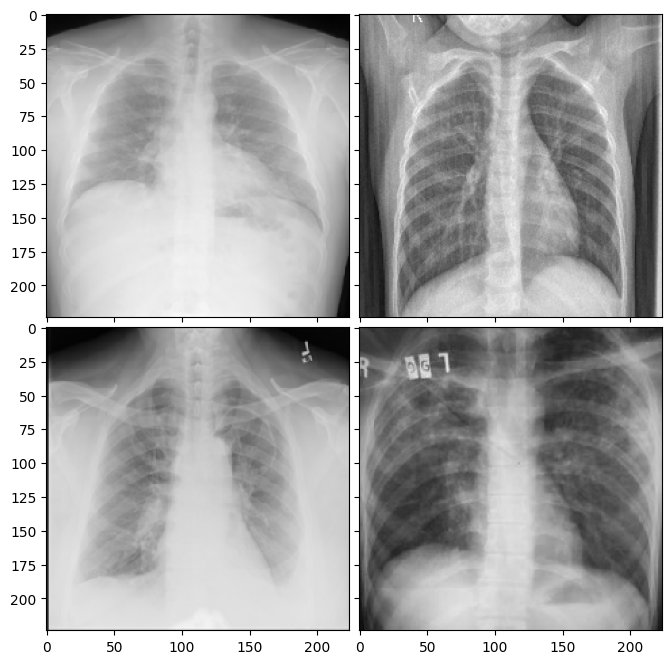

In [19]:
# Need to add labels as title for each image
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import ImageGrid
image_list = [first_COVID_img, first_normal_img, first_pneumonia_img, first_tuberculosis_img]

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2),  
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, image_list):
    ax.imshow(im)

plt.show()

In [20]:
#from sklearn.metrics import confusion_matrix
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_true = np.argmax(y_true, axis=1)
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

2025-03-21 11:40:55.910825: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


165/165 [==============================] - 7s 41ms/step
Confusion Matrix:
 [[709 476 625 121]
 [441 307 401  67]
 [652 469 621  84]
 [107  65  98  16]]


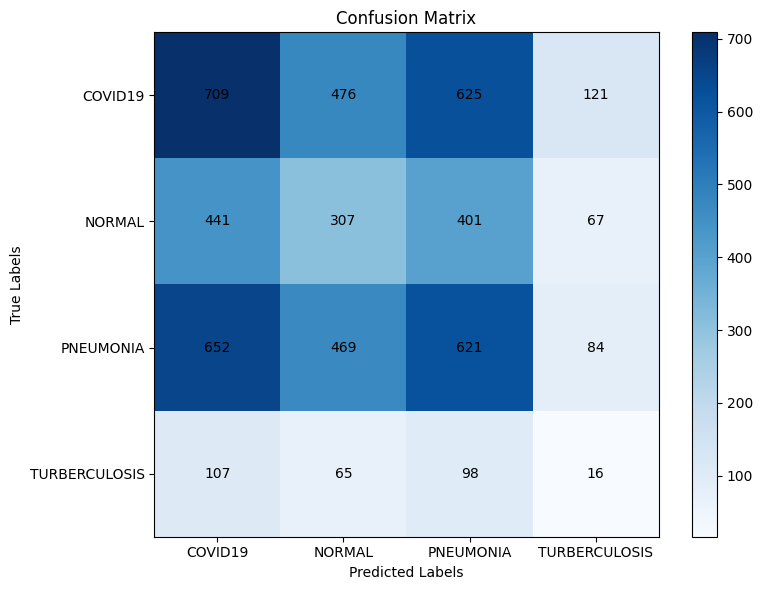

In [21]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Set axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set class labels on axes
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)

# Annotate each cell with the corresponding value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

## Model 4 - Good Hyperparameter Result

### Build Model

In [5]:
model = keras.Sequential() 
VGG16 = keras.applications.VGG16(
        include_top=False,
        weights="imagenet",
        input_tensor=None, 
        input_shape=(img_height, img_width, 3), 
        pooling="max",
        classes=4, 
        classifier_activation="softmax",
)
# Don't change what VGG16 has already learned
for layer in VGG16.layers: 
    layer.trainable = False

model.add(VGG16)
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(192, activation='relu'))
model.add(keras.layers.Dense(192, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))

### Compile and Train the Model

In [6]:
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', 'AUC', keras.metrics.F1Score(), keras.metrics.Recall(), keras.metrics.Precision()])
epochs = 15
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs
)

Epoch 1/15


I0000 00:00:1742584968.391963  283472 cuda_dnn.cc:529] Loaded cuDNN version 90501
I0000 00:00:1742584971.106391  283475 service.cc:148] XLA service 0x7fd55c12e440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742584971.106450  283475 service.cc:156]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2025-03-21 15:22:51.115807: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742584971.402654  283475 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1030/1030 [==============================] - 455s 434ms/step - loss: 1.5487 - accuracy: 0.7103 - auc: 0.8829 - f1_score: 0.6697 - recall: 0.7045 - precision: 0.7159 - val_loss: 0.8412 - val_accuracy: 0.7583 - val_auc: 0.9237 - val_f1_score: 0.7441 - val_recall: 0.7491 - val_precision: 0.7658
Epoch 2/15
1030/1030 [==============================] - 44s 42ms/step - loss: 0.6071 - accuracy: 0.8010 - auc: 0.9483 - f1_score: 0.7870 - recall: 0.7905 - precision: 0.8118 - val_loss: 0.6466 - val_accuracy: 0.7834 - val_auc: 0.9408 - val_f1_score: 0.7883 - val_recall: 0.7709 - val_precision: 0.7928
Epoch 3/15
1030/1030 [==============================] - 43s 42ms/step - loss: 0.4646 - accuracy: 0.8319 - auc: 0.9640 - f1_score: 0.8257 - recall: 0.8210 - precision: 0.8433 - val_loss: 0.4653 - val_accuracy: 0.8283 - val_auc: 0.9628 - val_f1_score: 0.8350 - val_recall: 0.8173 - val_precision: 0.8415
Epoch 4/15
1030/1030 [==============================] - 43s 41ms/step - loss: 0.3917 - accuracy: 0.8559

### Visualize Training Results

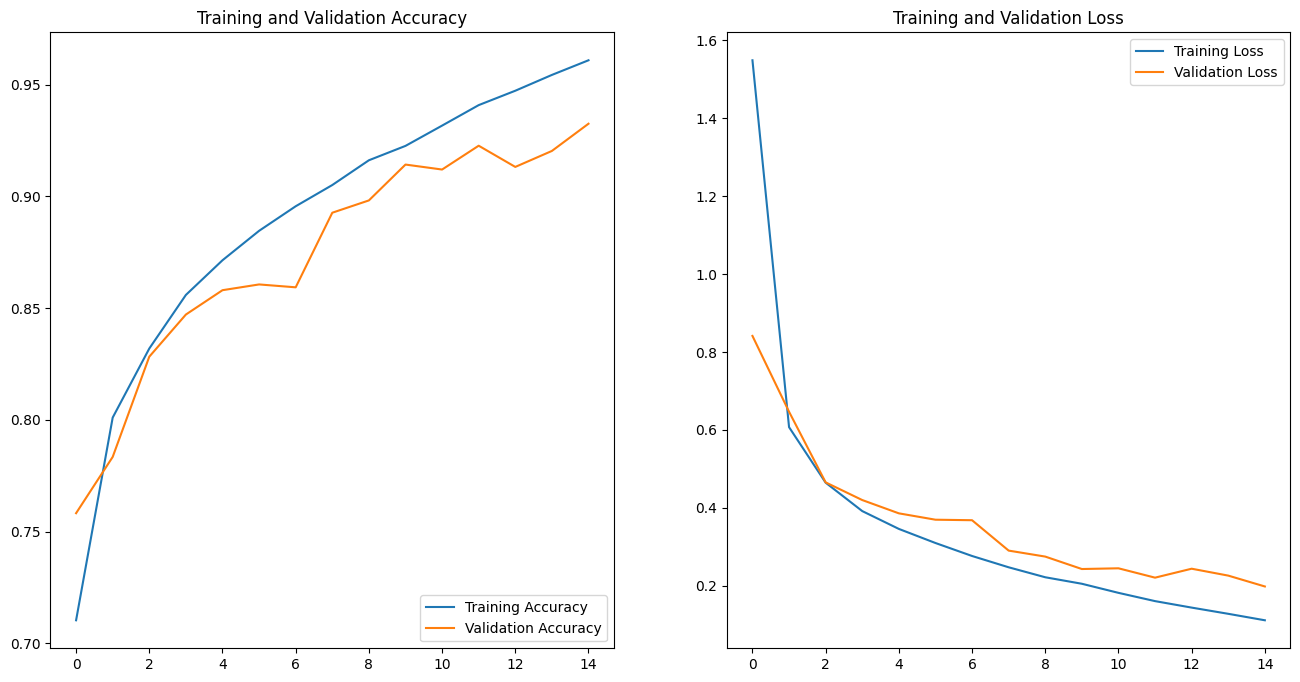

In [7]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the Model

In [8]:
loss, acc, AUC, f1_score, recall, precision = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.4f}")
print(f"Test loss: {loss:.4f}")
print(f"Test AUC: {AUC:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test precision: {precision:.4f}")
print("Test f1 score", f1_score)

165/165 [==============================] - 56s 320ms/step - loss: 0.2037 - accuracy: 0.9253 - auc: 0.9913 - f1_score: 0.9315 - recall: 0.9224 - precision: 0.9286
Test accuracy: 0.9253
Test loss: 0.2037
Test AUC: 0.9913
Test recall: 0.9224
Test precision: 0.9286
Test f1 score [0.96180373 0.87568414 0.9144755  0.97400343]


### Predict on New Data

In [9]:
# import PIL
# import PIL.Image
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#Load images
first_COVID_img = tf.keras.utils.load_img("Data/test/COVID19/covid_10.png", target_size=(224, 224))
first_normal_img = tf.keras.utils.load_img("Data/test/NORMAL/IM-0009-0001.jpeg", target_size=(224, 224))
first_pneumonia_img = tf.keras.utils.load_img("Data/test/PNEUMONIA/non_COVID (10).png", target_size=(224, 224))
first_tuberculosis_img = tf.keras.utils.load_img("Data/test/TUBERCULOSIS/TB.1013.jpg", target_size=(224, 224))

#Image to vector
first_COVID_img_array =tf.keras.utils.img_to_array(first_COVID_img)
first_normal_img_array =tf.keras.utils.img_to_array(first_normal_img)
first_pneumonia_img_array =tf.keras.utils.img_to_array(first_pneumonia_img)
first_tuberculosis_img_array =tf.keras.utils.img_to_array(first_tuberculosis_img)

#Dimension expansion
first_COVID_img_array = tf.expand_dims(first_COVID_img_array, 0)
first_normal_img_array = tf.expand_dims(first_normal_img_array, 0)
first_pneumonia_img_array = tf.expand_dims(first_pneumonia_img_array, 0)
first_tuberculosis_img_array = tf.expand_dims(first_tuberculosis_img_array, 0)

#Predictions
first_COVID_prediction = model.predict(first_COVID_img_array)
first_normal_prediction = model.predict(first_normal_img_array)
first_pneumonia_prediction = model.predict(first_pneumonia_img_array)
first_tuberculosis_prediction = model.predict(first_tuberculosis_img_array)

#Obtain probability of class
first_COVID_score = tf.nn.softmax(first_COVID_prediction[0])
first_normal_score = tf.nn.softmax(first_normal_prediction[0])
first_pneumonia_score = tf.nn.softmax(first_pneumonia_prediction[0])
first_tuberculosis_score = tf.nn.softmax(first_tuberculosis_prediction[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_COVID_score)], 100 * np.max(first_COVID_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_normal_score)], 100 * np.max(first_normal_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_pneumonia_score)], 100 * np.max(first_pneumonia_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_tuberculosis_score)], 100 * np.max(first_tuberculosis_score)))

1/1 [==============================] - 0s 18ms/step
This image most likely belongs to COVID19 with a 47.14 percent confidence.
This image most likely belongs to PNEUMONIA with a 46.71 percent confidence.
This image most likely belongs to PNEUMONIA with a 47.39 percent confidence.
This image most likely belongs to TURBERCULOSIS with a 47.54 percent confidence.


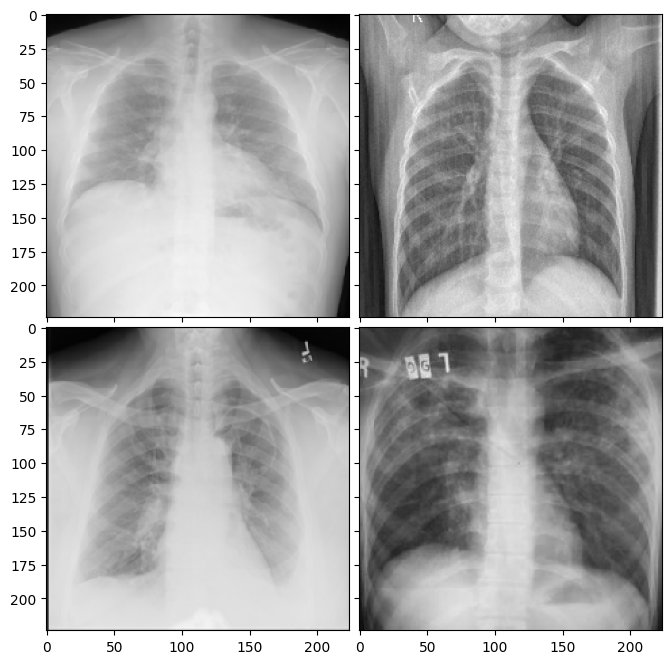

In [10]:
# Need to add labels as title for each image
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import ImageGrid
image_list = [first_COVID_img, first_normal_img, first_pneumonia_img, first_tuberculosis_img]

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2),  
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, image_list):
    ax.imshow(im)

plt.show()

In [11]:
# from sklearn.metrics import confusion_matrix
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_true = np.argmax(y_true, axis=1)
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

2025-03-21 15:41:22.123482: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


165/165 [==============================] - 4s 25ms/step
Confusion Matrix:
 [[679 494 645 113]
 [448 310 398  60]
 [624 461 638 103]
 [ 88  77 106  15]]


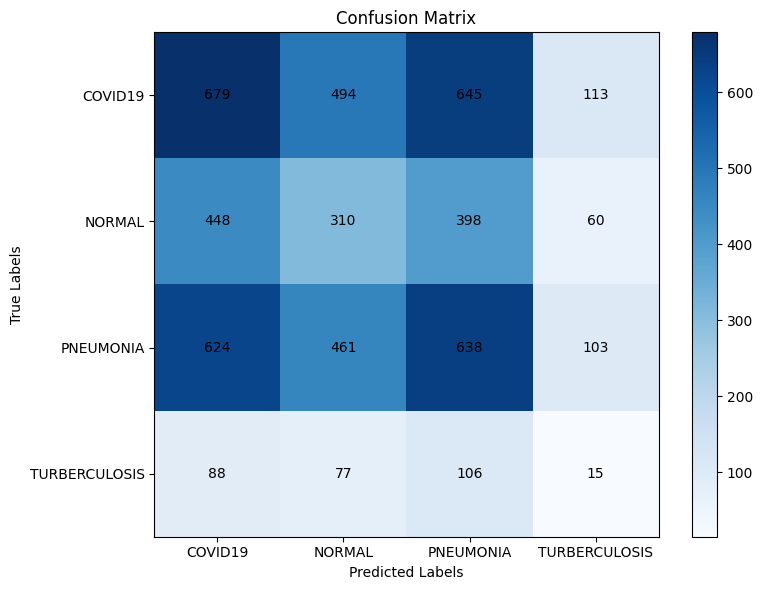

In [12]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Set axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set class labels on axes
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)

# Annotate each cell with the corresponding value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

## Model 5 - Good Hyperparameter Result - One of the Top Results - In Milestone 2!
### Build Model

In [19]:
model = keras.Sequential() 
VGG16 = keras.applications.VGG16(
        include_top=False,
        weights="imagenet",
        input_tensor=None, 
        input_shape=(img_height, img_width, 3), 
        pooling="max",
        classes=4, 
        classifier_activation="softmax",
)
# Don't change what VGG16 has already learned
for layer in VGG16.layers: 
    layer.trainable = False

model.add(VGG16)
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(320, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))

### Compile and Train the Model

In [20]:
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', 'AUC', keras.metrics.F1Score(), keras.metrics.Recall(), keras.metrics.Precision()])
epochs = 15
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs
)

Epoch 1/15
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 51s 46ms/step - AUC: 0.8596 - accuracy: 0.6900 - f1_score: 0.6433 - loss: 2.2151 - precision_1: 0.6929 - recall_1: 0.6871 - val_AUC: 0.9415 - val_accuracy: 0.7892 - val_f1_score: 0.7969 - val_loss: 0.7029 - val_precision_1: 0.7956 - val_recall_1: 0.7814
Epoch 2/15
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - AUC: 0.9529 - accuracy: 0.8148 - f1_score: 0.8132 - loss: 0.6187 - precision_1: 0.8201 - recall_1: 0.8093 - val_AUC: 0.9430 - val_accuracy: 0.7729 - val_f1_score: 0.7973 - val_loss: 0.6488 - val_precision_1: 0.7809 - val_recall_1: 0.7638
Epoch 3/15
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - AUC: 0.9709 - accuracy: 0.8561 - f1_score: 0.8596 - loss: 0.4234 - precision_1: 0.8620 - recall_1: 0.8503 - val_AUC: 0.9734 - val_accuracy: 0.8592 - val_f1_score: 0.8670 - val_loss: 0.3922 - val_precision_1: 0.8674 - val_recall_1: 0.8524
Epoch 4/15
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - AUC: 0.9783 - accuracy: 0.8750 - f1_score: 0.8834 - lo

### Visualize Training Results

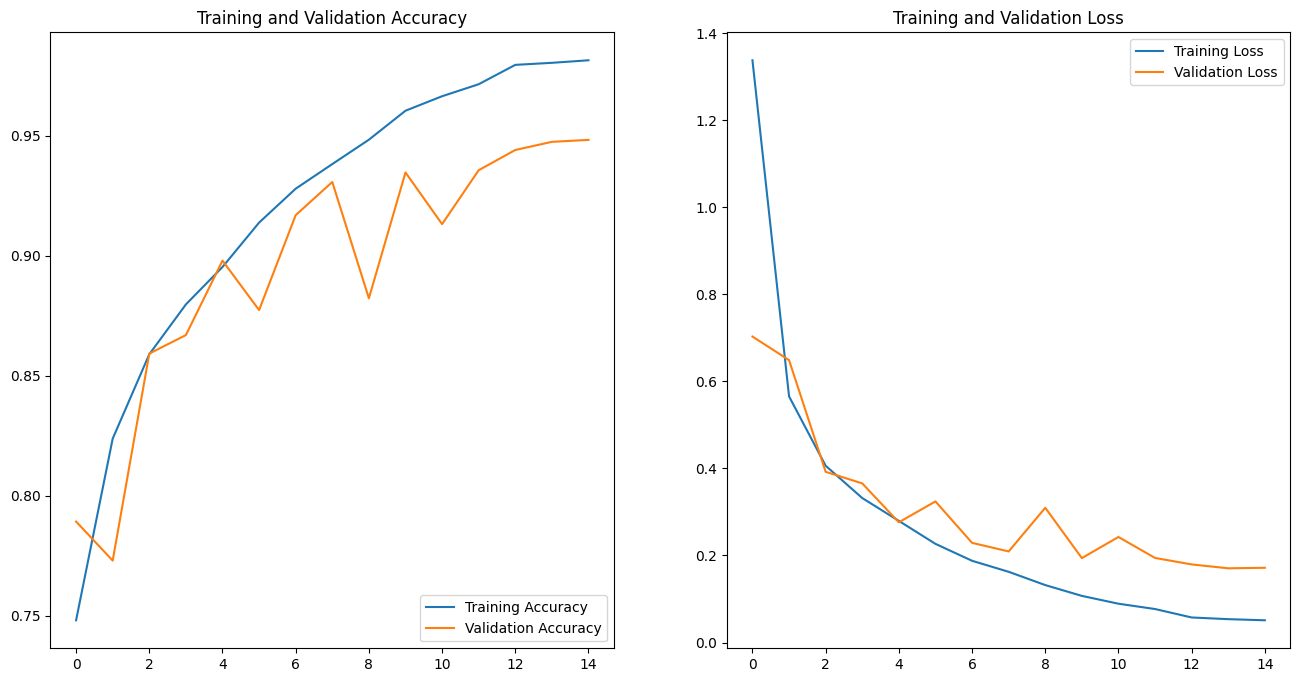

In [21]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the Model

In [22]:
loss, acc, AUC, f1_score, recall, precision = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.4f}")
print(f"Test loss: {loss:.4f}")
print(f"Test AUC: {AUC:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test precision: {precision:.4f}")
print("Test f1 score", f1_score)

165/165 ━━━━━━━━━━━━━━━━━━━━ 64s 369ms/step - AUC: 0.9957 - accuracy: 0.9521 - f1_score: 0.9526 - loss: 0.1340 - precision_1: 0.9534 - recall_1: 0.9516
Test accuracy: 0.9519
Test loss: 0.1491
Test AUC: 0.9946
Test recall: 0.9517
Test precision: 0.9530
Test f1 score tf.Tensor([0.9755584  0.92154413 0.9438624  0.97418237], shape=(4,), dtype=float32)


### Predict on New Data

In [23]:
# import PIL
# import PIL.Image
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#Load images
first_COVID_img = tf.keras.utils.load_img("Data/test/COVID19/covid_10.png", target_size=(224, 224))
first_normal_img = tf.keras.utils.load_img("Data/test/NORMAL/IM-0009-0001.jpeg", target_size=(224, 224))
first_pneumonia_img = tf.keras.utils.load_img("Data/test/PNEUMONIA/non_COVID (10).png", target_size=(224, 224))
first_tuberculosis_img = tf.keras.utils.load_img("Data/test/TUBERCULOSIS/TB.1013.jpg", target_size=(224, 224))

#Image to vector
first_COVID_img_array =tf.keras.utils.img_to_array(first_COVID_img)
first_normal_img_array =tf.keras.utils.img_to_array(first_normal_img)
first_pneumonia_img_array =tf.keras.utils.img_to_array(first_pneumonia_img)
first_tuberculosis_img_array =tf.keras.utils.img_to_array(first_tuberculosis_img)

#Dimension expansion
first_COVID_img_array = tf.expand_dims(first_COVID_img_array, 0)
first_normal_img_array = tf.expand_dims(first_normal_img_array, 0)
first_pneumonia_img_array = tf.expand_dims(first_pneumonia_img_array, 0)
first_tuberculosis_img_array = tf.expand_dims(first_tuberculosis_img_array, 0)

#Predictions
first_COVID_prediction = model.predict(first_COVID_img_array)
first_normal_prediction = model.predict(first_normal_img_array)
first_pneumonia_prediction = model.predict(first_pneumonia_img_array)
first_tuberculosis_prediction = model.predict(first_tuberculosis_img_array)

#Obtain probability of class
first_COVID_score = tf.nn.softmax(first_COVID_prediction[0])
first_normal_score = tf.nn.softmax(first_normal_prediction[0])
first_pneumonia_score = tf.nn.softmax(first_pneumonia_prediction[0])
first_tuberculosis_score = tf.nn.softmax(first_tuberculosis_prediction[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_COVID_score)], 100 * np.max(first_COVID_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_normal_score)], 100 * np.max(first_normal_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_pneumonia_score)], 100 * np.max(first_pneumonia_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_tuberculosis_score)], 100 * np.max(first_tuberculosis_score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This image most likely belongs to COVID19 with a 47.50 percent confidence.
This image most likely belongs to NORMAL with a 43.51 percent confidence.
This image most likely belongs to PNEUMONIA with a 47.15 percent confidence.
This image most likely belongs to TURBERCULOSIS with a 47.54 percent confidence.


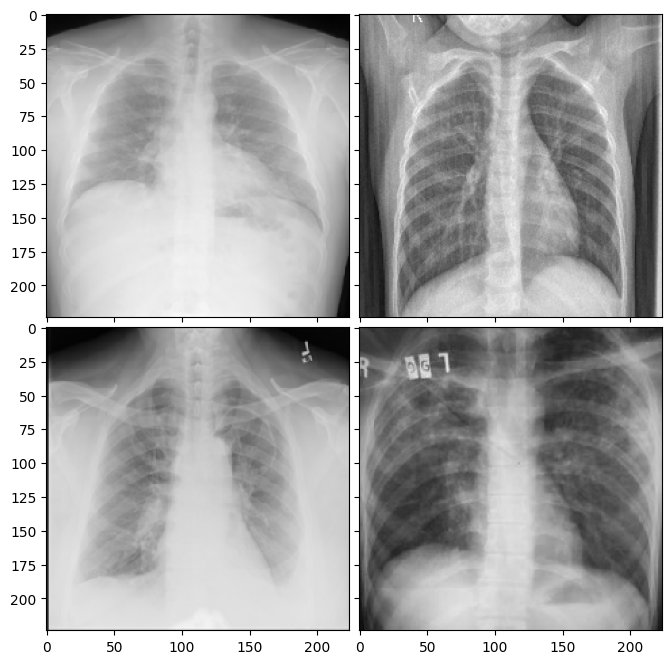

In [24]:
# Need to add labels as title for each image
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import ImageGrid
image_list = [first_COVID_img, first_normal_img, first_pneumonia_img, first_tuberculosis_img]

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2),  
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, image_list):
    ax.imshow(im)

plt.show()

In [25]:
# from sklearn.metrics import confusion_matrix
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_true = np.argmax(y_true, axis=1)
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

2025-03-21 18:37:12.799354: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step
Confusion Matrix:
 [[699 431 695 106]
 [435 295 420  66]
 [640 398 681 107]
 [100  69 101  16]]


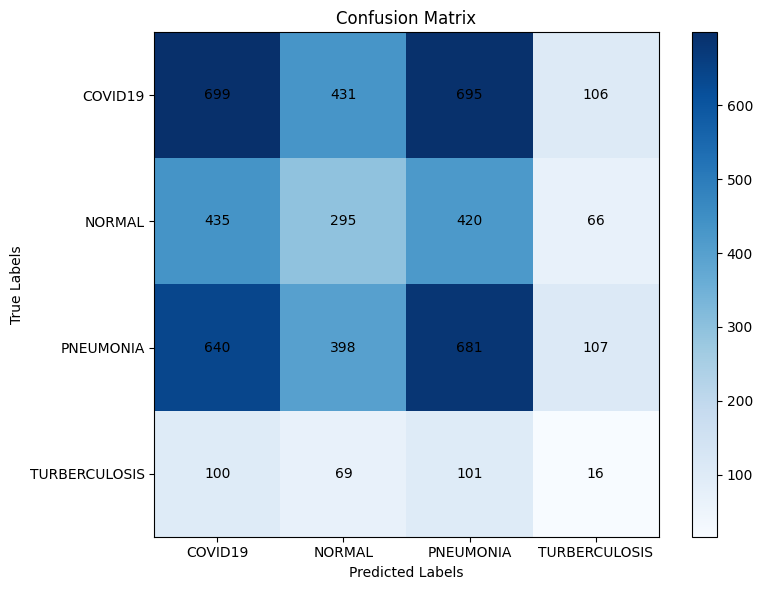

In [26]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Set axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set class labels on axes
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)

# Annotate each cell with the corresponding value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

## Model 6 - Good Hyperparameter Result - One of the Top Results!

### Build Model

In [33]:
model = keras.Sequential() 
VGG16 = keras.applications.VGG16(
        include_top=False,
        weights="imagenet",
        input_tensor=None, 
        input_shape=(img_height, img_width, 3), 
        pooling="max",
        classes=4, 
        classifier_activation="softmax",
)
# Don't change what VGG16 has already learned
for layer in VGG16.layers: 
    layer.trainable = False

model.add(VGG16)
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(192, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))

### Compile and Train the Model

In [34]:
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', 'AUC', keras.metrics.F1Score(), keras.metrics.Recall(), keras.metrics.Precision()])
epochs = 15
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs
)

Epoch 1/15
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 50s 45ms/step - AUC: 0.8479 - accuracy: 0.6795 - f1_score: 0.6325 - loss: 2.5290 - precision_1: 0.6831 - recall_1: 0.6769 - val_AUC: 0.9205 - val_accuracy: 0.7395 - val_f1_score: 0.7577 - val_loss: 0.9053 - val_precision_1: 0.7464 - val_recall_1: 0.7316
Epoch 2/15
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - AUC: 0.9514 - accuracy: 0.8194 - f1_score: 0.8149 - loss: 0.6615 - precision_1: 0.8248 - recall_1: 0.8153 - val_AUC: 0.9588 - val_accuracy: 0.8286 - val_f1_score: 0.8372 - val_loss: 0.5331 - val_precision_1: 0.8356 - val_recall_1: 0.8204
Epoch 3/15
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - AUC: 0.9668 - accuracy: 0.8472 - f1_score: 0.8498 - loss: 0.4775 - precision_1: 0.8525 - recall_1: 0.8421 - val_AUC: 0.9709 - val_accuracy: 0.8587 - val_f1_score: 0.8724 - val_loss: 0.4148 - val_precision_1: 0.8638 - val_recall_1: 0.8501
Epoch 4/15
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - AUC: 0.9759 - accuracy: 0.8696 - f1_score: 0.8758 - lo

### Visualize Training Results

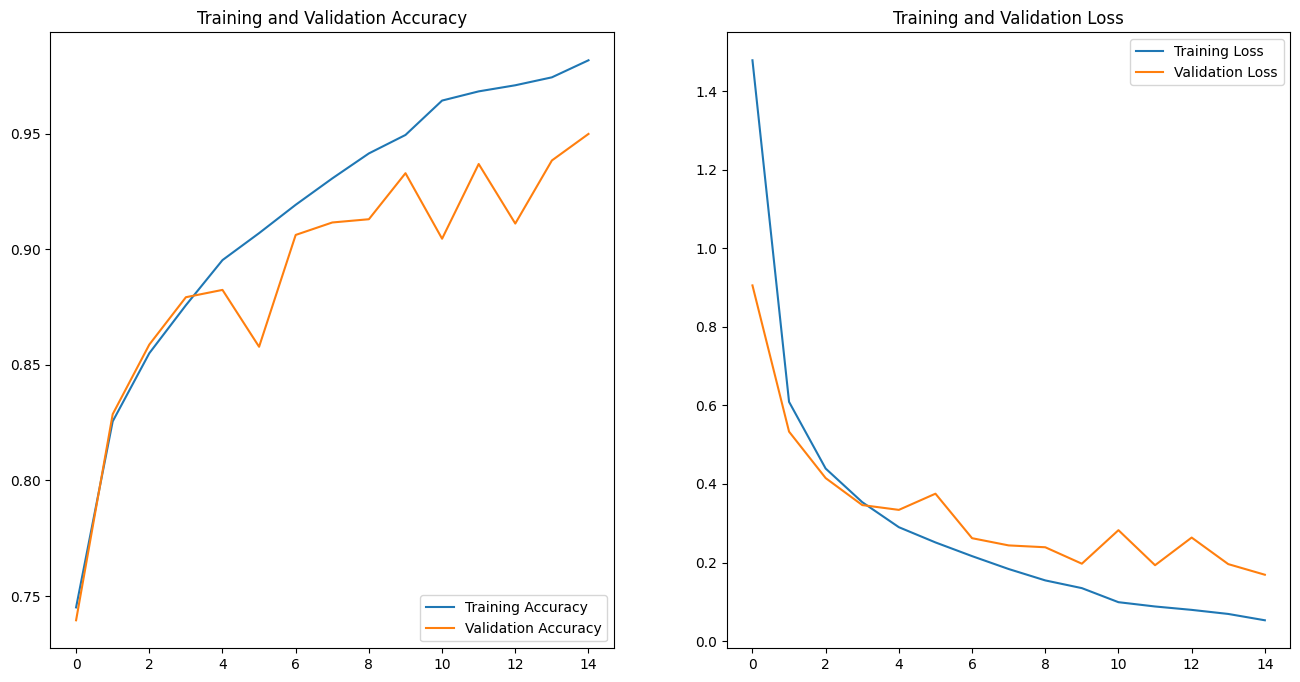

In [35]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the Model

In [36]:
loss, acc, AUC, f1_score, recall, precision = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.4f}")
print(f"Test loss: {loss:.4f}")
print(f"Test AUC: {AUC:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test precision: {precision:.4f}")
print("Test f1 score", f1_score)

165/165 ━━━━━━━━━━━━━━━━━━━━ 65s 379ms/step - AUC: 0.9948 - accuracy: 0.9520 - f1_score: 0.9554 - loss: 0.1445 - precision_1: 0.9528 - recall_1: 0.9519
Test accuracy: 0.9511
Test loss: 0.1504
Test AUC: 0.9944
Test recall: 0.9509
Test precision: 0.9522
Test f1 score tf.Tensor([0.9780219 0.9182847 0.9401148 0.9841269], shape=(4,), dtype=float32)


### Predict on New Data

In [37]:
# import PIL
# import PIL.Image
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#Load images
first_COVID_img = tf.keras.utils.load_img("Data/test/COVID19/covid_10.png", target_size=(224, 224))
first_normal_img = tf.keras.utils.load_img("Data/test/NORMAL/IM-0009-0001.jpeg", target_size=(224, 224))
first_pneumonia_img = tf.keras.utils.load_img("Data/test/PNEUMONIA/non_COVID (10).png", target_size=(224, 224))
first_tuberculosis_img = tf.keras.utils.load_img("Data/test/TUBERCULOSIS/TB.1013.jpg", target_size=(224, 224))

#Image to vector
first_COVID_img_array =tf.keras.utils.img_to_array(first_COVID_img)
first_normal_img_array =tf.keras.utils.img_to_array(first_normal_img)
first_pneumonia_img_array =tf.keras.utils.img_to_array(first_pneumonia_img)
first_tuberculosis_img_array =tf.keras.utils.img_to_array(first_tuberculosis_img)

#Dimension expansion
first_COVID_img_array = tf.expand_dims(first_COVID_img_array, 0)
first_normal_img_array = tf.expand_dims(first_normal_img_array, 0)
first_pneumonia_img_array = tf.expand_dims(first_pneumonia_img_array, 0)
first_tuberculosis_img_array = tf.expand_dims(first_tuberculosis_img_array, 0)

#Predictions
first_COVID_prediction = model.predict(first_COVID_img_array)
first_normal_prediction = model.predict(first_normal_img_array)
first_pneumonia_prediction = model.predict(first_pneumonia_img_array)
first_tuberculosis_prediction = model.predict(first_tuberculosis_img_array)

#Obtain probability of class
first_COVID_score = tf.nn.softmax(first_COVID_prediction[0])
first_normal_score = tf.nn.softmax(first_normal_prediction[0])
first_pneumonia_score = tf.nn.softmax(first_pneumonia_prediction[0])
first_tuberculosis_score = tf.nn.softmax(first_tuberculosis_prediction[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_COVID_score)], 100 * np.max(first_COVID_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_normal_score)], 100 * np.max(first_normal_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_pneumonia_score)], 100 * np.max(first_pneumonia_score)))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(first_tuberculosis_score)], 100 * np.max(first_tuberculosis_score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This image most likely belongs to COVID19 with a 41.50 percent confidence.
This image most likely belongs to NORMAL with a 47.53 percent confidence.
This image most likely belongs to PNEUMONIA with a 33.69 percent confidence.
This image most likely belongs to TURBERCULOSIS with a 47.54 percent confidence.


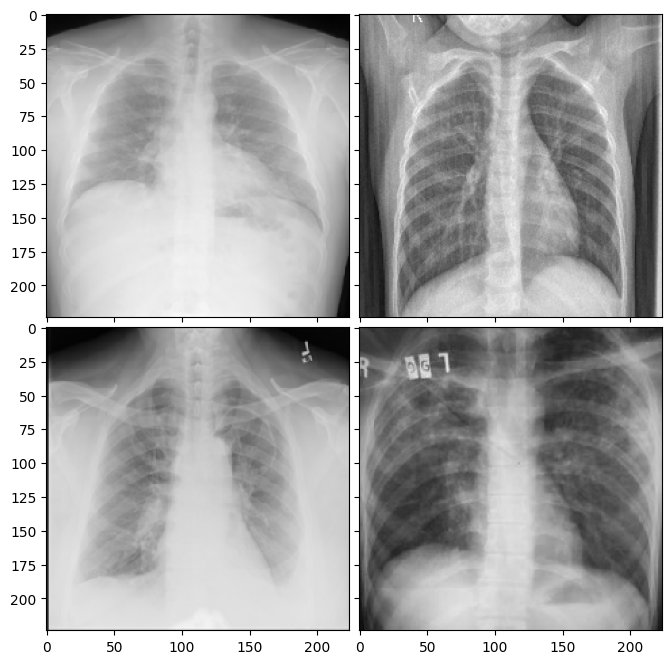

In [38]:
# Need to add labels as title for each image
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import ImageGrid
image_list = [first_COVID_img, first_normal_img, first_pneumonia_img, first_tuberculosis_img]

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2),  
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, image_list):
    ax.imshow(im)

plt.show()

In [39]:
# from sklearn.metrics import confusion_matrix
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_true = np.argmax(y_true, axis=1)
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step
Confusion Matrix:
 [[701 480 636 114]
 [435 292 421  68]
 [645 413 679  89]
 [110  71  95  10]]


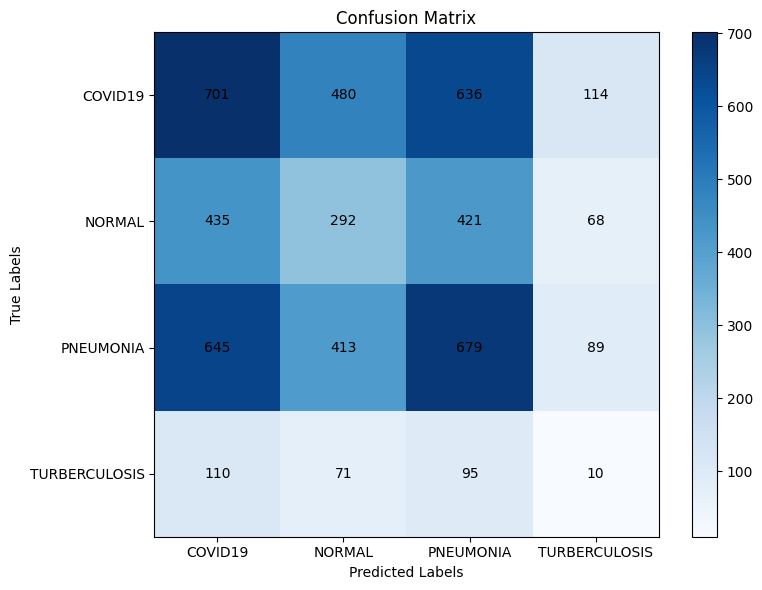

In [40]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Set axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set class labels on axes
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)

# Annotate each cell with the corresponding value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()